# Practical 17

Scenario: You want to store some data from the EMDB (for your own research project).
You decide to use sqlite for that.
Do the following:
- Decide on a search term (some possible examples: "herpes", "human", "apoferritin", "ribosome")
- using `requests` and the emdb API, find the entries related to your search term
- create an SQLite database, containing an "entries" table, with an "id" field, a "title" field, and a "year" field
- `INSERT` in the "entries" table all the entries you found with your request to the EMDB API, with the "title" of the entry, and the year it was deposited
- `SELECT` that data from the table, store it in a variable
- store the content in a pandas dataframe, and plot the number of deposited entry as a function of the year

In [3]:
import requests

search = "mismatch"
emdb_api = "https://www.ebi.ac.uk/emdb/api"
request = f"{emdb_api}/search/{search}"
request

'https://www.ebi.ac.uk/emdb/api/search/mismatch'

In [7]:
data = requests.get(request)
data_json = data.json()

In [9]:
data_json[0].keys()

dict_keys(['_id', 'admin', 'crossreferences', 'emdb_id', 'interpretation', 'map', 'sample', 'structure_determination_list', 'version'])

In [ ]:
import sqlite3
db = sqlite3.connect("db")
cur = db.cursor()
cur.execute("CREATE TABLE entries(id, title, year)")

In [64]:
data = []
for i in data_json:
    new_row = (i["emdb_id"], i["admin"]["title"], i["admin"]["key_dates"]["deposition"][:4])
    data.append(new_row)

cur.executemany("INSERT INTO entries VALUES(?,?,?)", data)
db.commit()

In [99]:
result_data = cur.execute("SELECT id, title, year FROM entries")
pandas_results = result_data.fetchall()

import pandas as pd
pandas_db = pd.DataFrame(
{
    "id":[i[0] for i in pandas_results],
    "title":[i[1] for i in pandas_results],
    "year":[i[2] for i in pandas_results]
})

In [86]:
pandas_db

,id,title,year
0,EMD-13074,The structure of MutS bound to one molecule of...,2021
1,EMD-13063,The structure of MutS bound to two molecules o...,2021
2,EMD-25616,Structure of the yeast clamp loader (Replicati...,2021
3,EMD-25614,Structure of the yeast clamp loader (Replicati...,2021
4,EMD-13071,The structure of MutS bound to two molecules o...,2021
...,...,...,...
106,EMD-5570,Focused asymmetric reconstruction III (map 5/8...,2013
107,EMD-5571,Focused asymmetric reconstruction IV (map 6/8)...,2013
108,EMD-5572,Focused asymmetric reconstruction V (map 7/8):...,2013
109,EMD-2398,MuB is an AAA+ ATPase that forms helical filam...,2013


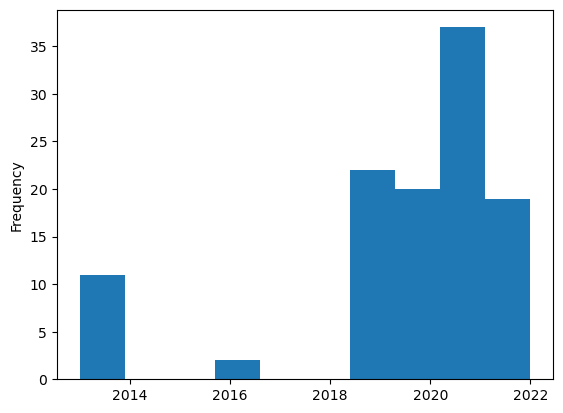

In [101]:
import matplotlib.pyplot as plt

pandas_db["year"] = pandas_db["year"].astype(int)

pandas_db["year"].plot(kind = "hist")
plt.show()